# Import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data collection and processing

In [3]:
heart_datset = pd.read_csv('Heart_Disease_Prediction.csv')

Print 5 rows

In [4]:
heart_datset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
heart_datset.shape

(270, 14)

Finding missing values

In [6]:
heart_datset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
heart_datset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Statistical Measure about the data

In [8]:
heart_datset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Encode Heart disease column (Traget)

In [11]:
heart_datset['Heart Disease'] = heart_datset['Heart Disease'].replace({'Presence': 1, 'Absence': 0})


In [12]:
heart_datset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


Checking the count of label/Target Variable (Classification)

In [13]:
heart_datset['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

Grouping the label and find the mean.

In [14]:
heart_datset.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
0,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
1,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


0 --> Abscence of heart disease

1 --> Presence of heart disease

# Splitting the features and labeles (indipendant and dependant Variable)

In [15]:
X = heart_datset.drop(columns = 'Heart Disease')

Y = heart_datset['Heart Disease']

In [16]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [17]:
Y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [18]:
X.shape

(270, 13)

In [19]:
Y.shape

(270,)

# Train Test Split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(270, 13) (216, 13) (54, 13)


In [22]:
# FIX y shape (make it 1D)
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)

In [23]:
print(Y.shape,Y_train.shape,Y_test.shape,)

(270,) (216,) (54,)


# Data Standardization

In [24]:
Scaler = StandardScaler()

In [27]:
Scaler.fit(X_train) 

StandardScaler()

In [28]:
X_train = Scaler.transform(X_train)

In [30]:
X_test = Scaler.transform(X_test)

In [31]:
print(X_train)

[[-1.3361797  -1.47528661 -0.10435568 ...  0.69812296 -0.70900762
  -0.85615942]
 [-0.03903446  0.67783439  0.9202274  ...  0.69812296  1.43288953
  -0.85615942]
 [-0.36332077 -1.47528661 -0.10435568 ... -0.95896011 -0.70900762
  -0.85615942]
 ...
 [-1.44427514  0.67783439 -1.12893877 ...  0.69812296 -0.70900762
   0.69787785]
 [-0.25522534  0.67783439 -1.12893877 ... -0.95896011  0.36194095
  -0.85615942]
 [ 0.93382446 -1.47528661  0.9202274  ...  0.69812296  1.43288953
  -0.85615942]]


In [32]:
print(X_test)

[[ 0.06906097 -1.47528661 -1.12893877  0.22616347  0.03326693 -0.39380225
   0.95252037  0.4688221  -0.68511879  0.31918397  0.69812296 -0.70900762
  -0.85615942]
 [-1.3361797   0.67783439  0.9202274   0.51420186 -0.4328297  -0.39380225
  -1.05474207  1.23190488 -0.68511879 -0.93924147 -0.95896011 -0.70900762
  -0.85615942]
 [ 0.06906097  0.67783439 -1.12893877 -0.06187491  0.26631524 -0.39380225
  -1.05474207  0.19949877 -0.68511879 -0.93924147 -0.95896011 -0.70900762
  -0.85615942]
 [ 0.60953815  0.67783439  0.9202274  -0.81077472 -0.35514693  2.53934556
  -1.05474207  0.42393488  1.4596009   0.31918397 -0.95896011  1.43288953
   1.21589027]
 [-0.36332077  0.67783439  0.9202274   0.51420186  0.24689455 -0.39380225
   0.95252037  1.59100266  1.4596009  -0.93924147 -0.95896011 -0.70900762
  -0.85615942]
 [ 0.50144272  0.67783439 -0.10435568  1.09027864 -0.70471941  2.53934556
  -1.05474207  0.28927321 -0.68511879  0.49895903 -0.95896011 -0.70900762
  -0.85615942]
 [-1.3361797   0.67783

# Training the Model

In [33]:
# Create and train the logistic regression model

In [34]:
model = LogisticRegression()

In [35]:
#  Tarining the LogisticRegression with training data

In [36]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

Accuracy Score

In [37]:
# Accuracy on training Data

In [38]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

[0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1]


In [39]:
print('accurcay on training data:',training_data_accuracy)

accurcay on training data: 0.8518518518518519


In [40]:
# Accuracy on Test Data

In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [42]:
print(test_data_accuracy)

0.8518518518518519


# Generate a classification report

In [43]:

print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



In [44]:
Y_test.shape

(54,)

In [45]:
X_test_prediction.shape

(54,)

# Generate a confusion matrix

In [46]:

conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[24  6]
 [ 2 22]]


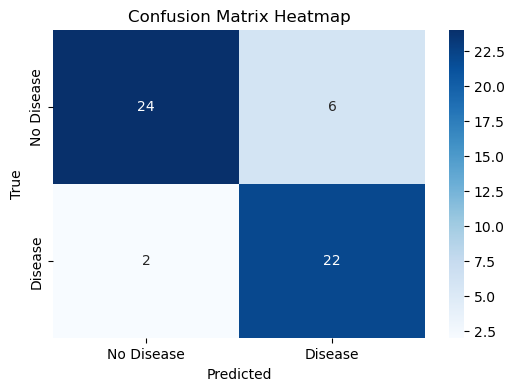

In [47]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

EXPLANATION:¶
To interpret this confusion matrix, let's understand what each value represents:

True Positive (TP): The number of samples correctly predicted as positive (heart disease patients) - 22

True Negative (TN): The number of samples correctly predicted as negative (non-heart disease patients) - 24

False Positive (FP): The number of samples incorrectly predicted as positive (non-heart disease patients incorrectly classified as heart disease patients) - 6

False Negative (FN): The number of samples incorrectly predicted as negative (heart disease patients incorrectly classified as non-heart disease patients) - 2

# Predictive system

In [48]:
input_data = (41,1,3,130,214,0,2,168,0,2,2,0,3)

In [49]:
# change the input data to numpy array

In [50]:
inputy_data_as_numpyarray = np.array(input_data)

In [51]:
# reshape the numpy array as we are predicting for only one instance

In [52]:
inputas_reshaped = inputy_data_as_numpyarray.reshape(1,-1)

In [53]:
# Standardise input data

In [54]:
std_data = Scaler.transform(inputas_reshaped)
print(std_data)

[[-1.44427514  0.67783439 -0.10435568 -0.06187491 -0.66587802 -0.39380225
   0.95252037  0.78303265 -0.68511879  0.85850915  0.69812296 -0.70900762
  -0.85615942]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
prediction = model.predict(std_data)
print(prediction)

[0]


In [56]:
if (prediction[0]==0):
    print('Person deos not have a heart disease')
else:
    print('Person have a heart disease')


Person deos not have a heart disease
